# Introdução

No contexto da indústria moderna, a manutenção eficiente de equipamentos é crucial para garantir a produtividade, reduzir custos e evitar paradas inesperadas na produção. Tradicionalmente, a manutenção é realizada de forma reativa ou preventiva, mas essas abordagens podem resultar em desperdício de recursos ou falhas inesperadas.

Com o avanço da Internet das Coisas (IoT) e da análise de dados, tornou-se possível coletar informações detalhadas de sensores instalados em máquinas, permitindo o desenvolvimento de sistemas inteligentes de manutenção preditiva. Esses sistemas utilizam algoritmos de aprendizado de máquina para analisar dados históricos e identificar padrões que precedem falhas, possibilitando intervenções mais assertivas e eficientes.

 ## Objetivo principal:
 
 Criar um sistema inteligente capaz de prever falhas em máquinas a partir de dados IoT e identificar o tipo de defeito.
    
- **Entradas:**

  - Medições de 8 atributos sensorizados de cada máquina.
    
- **Saídas esperadas:**
    
    - Classe do defeito (uma das 5 possíveis).
        
    - Probabilidade associada à previsão.
        
    - Relatórios e visualizações de insights operacionais e falhas.

## Descrição dos Dados 



|     | Campo                           | Descrição                                                                                 |
| --- | ------------------------------- | ----------------------------------------------------------------------------------------- |
| 0   | id                              | Identificador das amostras do banco.                                                      |
| 1   | id_produto                      | Identificador único do produto. Combinação da variável Tipo e um número de identificação. |
| 2   | tipo                            | Tipo de produto/máquina (L/M/H).                                                          |
| 3   | temperatura_ar                  | Temperatura do ar no ambiente (K).                                                        |
| 4   | temperatura_processo            | Temperatura do processo (K).                                                              |
| 5   | umidade_relativa                | Umidade relativa do ar (%).                                                               |
| 6   | velocidade_rotacional           | Velocidade rotacional da máquina em rotações por minutos (RPM).                           |
| 7   | torque                          | Torque da máquina em Nm.                                                                  |
| 8   | desgaste_da_ferramenta          | Duração do uso da ferramenta em minutos.                                                  |
| 9   | falha_maquina                   | Indica se houve falha na máquina (1) ou não (0).                                          |
| 10  | FDF (Falha Desgaste Ferramenta) | Indica se houve falha por desgaste da ferramenta (1) ou não (0).                          |
| 11  | FDC (Falha Dissipacao Calor)    | Indica se houve falha por dissipação de calor (1) ou não (0).                             |
| 12  | FP (Falha Potencia)             | Indica se houve falha por potência (1) ou não (0).                                        |
| 13  | FTE (Falha Tensao Excessiva)    | Indica se houve falha por tensão excessiva (1) ou não (0).                                |
| 14  | FA (Falha Aleatoria)            | Indica se houve falha aleatória (1) ou não (0).                                           |


## Configuração 

In [81]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [97]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis - EDA (Análise Exploratória de Dados)

## Carregando os Dados 

In [135]:
df = pd.read_csv('dataset/bootcamp_train.csv', index_col=0)

## Pré visualização

Objetivo é visualizar como todo.

In [136]:
df.head()

,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
id,,,,,,,,,,,,,,
0,L56434,L,298.3,309.1,90.0,1616.0,31.1,195.0,não,False,False,Não,False,Não
1,L48741,L,298.2,308.4,90.0,1388.0,53.8,137.0,Não,False,False,Não,False,Não
2,L48850,L,298.2,307.8,90.0,1528.0,31.1,NaN,Não,N,False,Não,False,Não
3,M20947,M,300.9,310.8,90.0,1599.0,33.0,7.0,não,False,False,Não,False,não
4,L53849,L,-36.0,310.5,90.0,1571.0,33.9,NaN,não,N,False,não,False,Não


In [137]:
df.columns

Index(['id_produto', 'tipo', 'temperatura_ar', 'temperatura_processo',
       'umidade_relativa', 'velocidade_rotacional', 'torque',
       'desgaste_da_ferramenta', 'falha_maquina',
       'FDF (Falha Desgaste Ferramenta)', 'FDC (Falha Dissipacao Calor)',
       'FP (Falha Potencia)', 'FTE (Falha Tensao Excessiva)',
       'FA (Falha Aleatoria)'],
      dtype='object')

In [138]:
df.shape

(35260, 14)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35260 entries, 0 to 35259
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_produto                       35260 non-null  object 
 1   tipo                             35260 non-null  object 
 2   temperatura_ar                   34644 non-null  float64
 3   temperatura_processo             34661 non-null  float64
 4   umidade_relativa                 35260 non-null  float64
 5   velocidade_rotacional            34509 non-null  float64
 6   torque                           34637 non-null  float64
 7   desgaste_da_ferramenta           34308 non-null  float64
 8   falha_maquina                    35260 non-null  object 
 9   FDF (Falha Desgaste Ferramenta)  35260 non-null  object 
 10  FDC (Falha Dissipacao Calor)     35260 non-null  object 
 11  FP (Falha Potencia)              35260 non-null  object 
 12  FTE (Falha Tensao Exces

In [140]:
df.describe()

,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta
count,34644.000000,34661.000000,35260.000000,34509.000000,34637.000000,34308.000000
mean,269.535241,280.457676,89.997672,1380.194181,40.210357,74.373266
std,96.342224,96.943630,0.142191,494.098759,8.831626,110.411937
min,-36.000000,-38.000000,80.590429,-161.000000,3.800000,-202.000000
25%,297.900000,308.500000,90.000000,1408.000000,34.300000,28.000000
50%,299.600000,309.800000,90.000000,1483.000000,40.300000,94.000000
75%,301.100000,310.900000,90.000000,1574.000000,46.200000,155.000000
max,304.500000,313.800000,94.575256,2886.000000,76.600000,253.000000


## Análisando dados faltantes 

In [141]:
print(f"tem valores faltando: {df.isna().any().any()}") 

tem valores faltando: True


In [142]:
print("Valores faltante por coluna ")
df.isna().sum()

Valores faltante por coluna 


id_produto                           0
tipo                                 0
temperatura_ar                     616
temperatura_processo               599
umidade_relativa                     0
velocidade_rotacional              751
torque                             623
desgaste_da_ferramenta             952
falha_maquina                        0
FDF (Falha Desgaste Ferramenta)      0
FDC (Falha Dissipacao Calor)         0
FP (Falha Potencia)                  0
FTE (Falha Tensao Excessiva)         0
FA (Falha Aleatoria)                 0
dtype: int64

In [143]:
print("Valores faltante por coluna %")
percentual = df.isna().sum() / df.shape[0] * 100
print(percentual.round(2))

Valores faltante por coluna %
id_produto                         0.00
tipo                               0.00
temperatura_ar                     1.75
temperatura_processo               1.70
umidade_relativa                   0.00
velocidade_rotacional              2.13
torque                             1.77
desgaste_da_ferramenta             2.70
falha_maquina                      0.00
FDF (Falha Desgaste Ferramenta)    0.00
FDC (Falha Dissipacao Calor)       0.00
FP (Falha Potencia)                0.00
FTE (Falha Tensao Excessiva)       0.00
FA (Falha Aleatoria)               0.00
dtype: float64


In [144]:
df_clean = df.dropna() 
print(f"A representaividade dos dados faltantes: {(1 - df_clean.shape[0]/df.shape[0])*100:.2f}%")

A representaividade dos dados faltantes: 9.65%


**Conclusão:** Como o valor é maior que **5%** não será possível eliminar diretamente. Não existe colunas que tem porcentagem significativo com valores faltante que possa ser eliminado. 

## Análise Univariada

O objetivo é examinar cada coluna individualmente para:

- Identificar inconsistências nos dados;
- Tratar valores ausentes;
- Detectar e lidar com outliers.

### ID Produto 

In [145]:
contagem  = df["id_produto"].value_counts()
contagem

id_produto
L53255    31
L53257    30
L53271    28
L55983    28
L54272    28
          ..
L55634     1
M21993     1
M22136     1
L56385     1
L47817     1
Name: count, Length: 9708, dtype: int64

In [146]:
print(f'Quantidade distintos: {df["id_produto"].nunique()}')

Quantidade distintos: 9708


In [147]:
valores = list(range(32))
quantidades = [(contagem == i).sum() for i in valores]

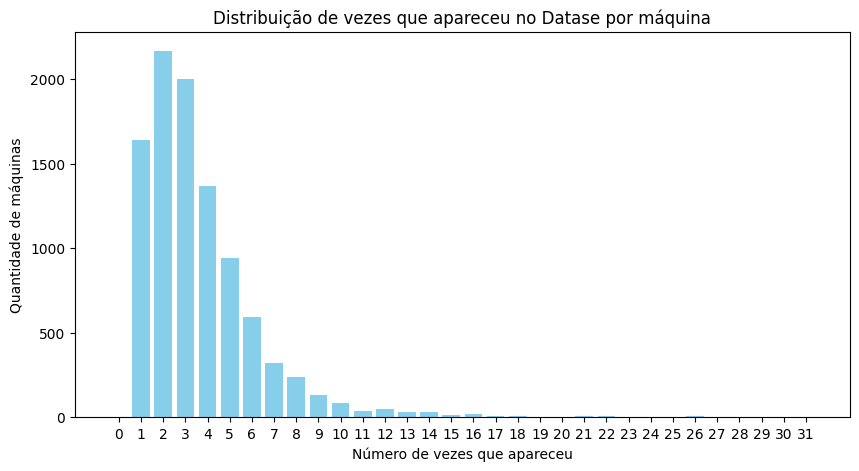

In [169]:
plt.figure(figsize=(10,5))
plt.bar(valores, quantidades, color='skyblue')
plt.xlabel("Número de vezes que apareceu")
plt.ylabel("Quantidade de máquinas")
plt.title("Distribuição de vezes que apareceu no Datase por máquina")
plt.xticks(valores)
plt.show()

In [170]:
for v, q in zip(valores, quantidades):
    print(f"Quantidade de máquinas que apareceu exatamente {v} vezes: {q}")

Quantidade de máquinas que apareceu exatamente 0 vezes: 0
Quantidade de máquinas que apareceu exatamente 1 vezes: 1637
Quantidade de máquinas que apareceu exatamente 2 vezes: 2168
Quantidade de máquinas que apareceu exatamente 3 vezes: 2000
Quantidade de máquinas que apareceu exatamente 4 vezes: 1368
Quantidade de máquinas que apareceu exatamente 5 vezes: 939
Quantidade de máquinas que apareceu exatamente 6 vezes: 592
Quantidade de máquinas que apareceu exatamente 7 vezes: 320
Quantidade de máquinas que apareceu exatamente 8 vezes: 236
Quantidade de máquinas que apareceu exatamente 9 vezes: 132
Quantidade de máquinas que apareceu exatamente 10 vezes: 87
Quantidade de máquinas que apareceu exatamente 11 vezes: 39
Quantidade de máquinas que apareceu exatamente 12 vezes: 46
Quantidade de máquinas que apareceu exatamente 13 vezes: 33
Quantidade de máquinas que apareceu exatamente 14 vezes: 28
Quantidade de máquinas que apareceu exatamente 15 vezes: 15
Quantidade de máquinas que apareceu ex

### Tipo

A coluna **tipo** mostrou consistente já que esperamos que tivesse somente trẽs tipos de valores.

In [150]:
df["tipo"].value_counts()

tipo
L    23855
M     8799
H     2606
Name: count, dtype: int64

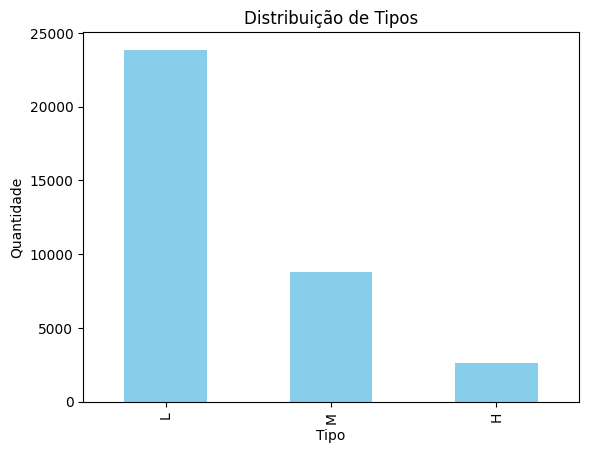

In [151]:
df["tipo"].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Tipo")
plt.ylabel("Quantidade")
plt.title("Distribuição de Tipos")
plt.show()

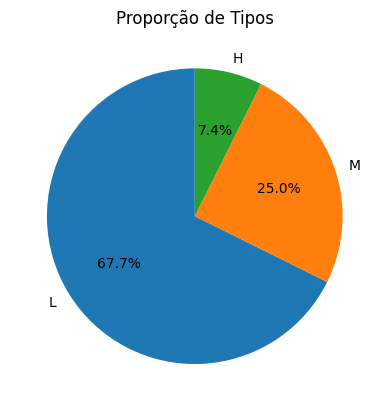

In [152]:
df["tipo"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Proporção de Tipos")
plt.ylabel("")
plt.show()


### Temperatura do AR

In [153]:
df["temperatura_ar"].describe()

count    34644.000000
mean       269.535241
std         96.342224
min        -36.000000
25%        297.900000
50%        299.600000
75%        301.100000
max        304.500000
Name: temperatura_ar, dtype: float64

In [154]:
# Transforma em celsius para facilitar o entendimento 
cel = df["temperatura_ar"] - 273.15
cel.describe()

count    34644.000000
mean        -3.614759
std         96.342224
min       -309.150000
25%         24.750000
50%         26.450000
75%         27.950000
max         31.350000
Name: temperatura_ar, dtype: float64

Não faz sentindo o valor da temperatura mímina ser <-309 ºC, faz necessário verificar se não é valor default. Por outro lado, temperatura mais maxima esta no intervalo esperado.

In [155]:
quantidade = (cel < -300).sum()
print(quantidade)

quantidade = (cel < 0).sum()
print(quantidade)

3132
3132


**Conclusão:** O valor da temperatura  -36 ºK é default, foi descidido que vamos substituir pela mediana, já que a média foi afetado.Para os valores faultante decidimos substituir pela média

In [156]:
# Substituir por mediana
mediana = df['temperatura_ar'].median()
df.loc[(df['temperatura_ar'] < 273), 'temperatura_ar'] = mediana
cel = df["temperatura_ar"] - 273.15
cel.describe()

count    34644.000000
mean        26.725248
std          1.806641
min         22.150000
25%         25.250000
50%         26.450000
75%         27.950000
max         31.350000
Name: temperatura_ar, dtype: float64

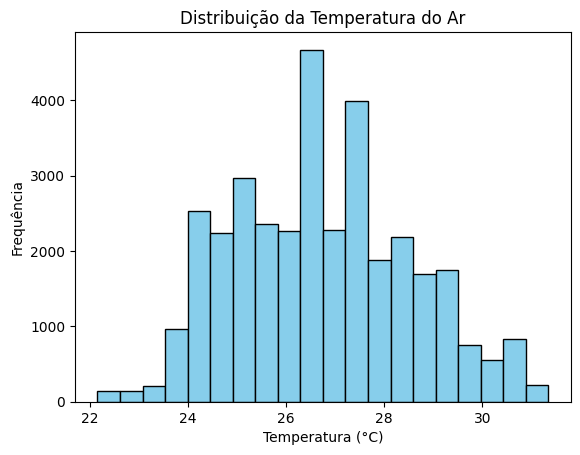

In [157]:
plt.hist(cel, bins=20, edgecolor='black', color='skyblue')
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frequência")
plt.title("Distribuição da Temperatura do Ar")
plt.show()

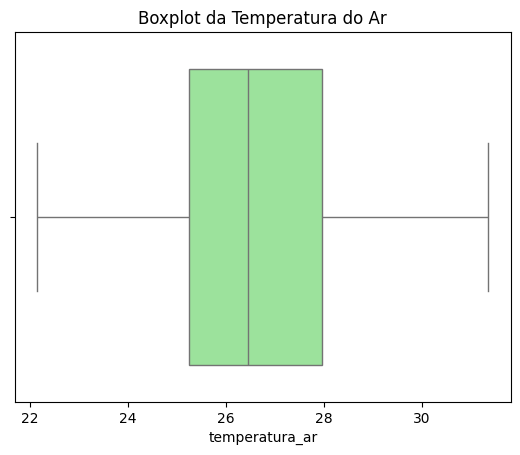

In [158]:
sns.boxplot(x=cel, color='lightgreen')
plt.title("Boxplot da Temperatura do Ar")
plt.show()

In [159]:
# Substituir valores ausentes pela media
df.fillna({'temperatura_ar': df['temperatura_ar'].mean()}, inplace=True)

cel = df["temperatura_ar"] - 273.15
cel.describe()

count    35260.000000
mean        26.725248
std          1.790790
min         22.150000
25%         25.350000
50%         26.550000
75%         27.850000
max         31.350000
Name: temperatura_ar, dtype: float64

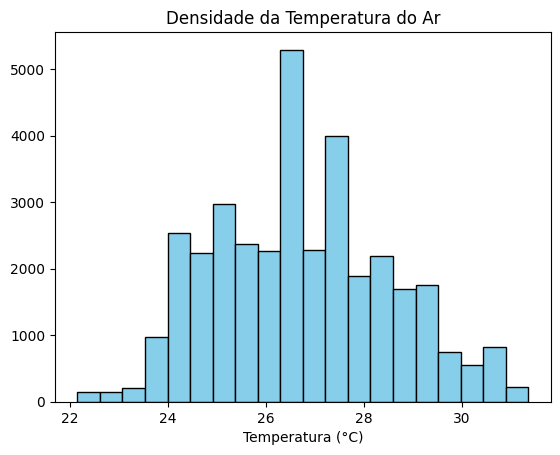

In [160]:
plt.hist(cel, bins=20, edgecolor='black', color='skyblue')
plt.title("Densidade da Temperatura do Ar")
plt.xlabel("Temperatura (°C)")
plt.show()

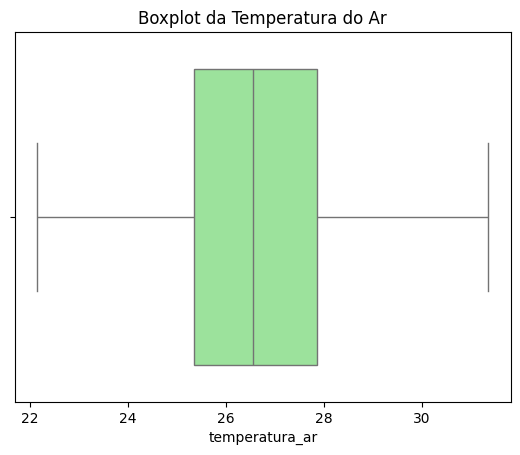

In [161]:
sns.boxplot(x=cel, color='lightgreen')
plt.title("Boxplot da Temperatura do Ar")
plt.show()

### Temperatuda do Processo 

Analogo a temperatuda do ar.

In [162]:
# Transforma em celsius para facilitar o entendimento 
cel = df["temperatura_processo"] - 273.15
cel.describe()

count    34661.000000
mean         7.307676
std         96.943630
min       -311.150000
25%         35.350000
50%         36.650000
75%         37.750000
max         40.650000
Name: temperatura_processo, dtype: float64

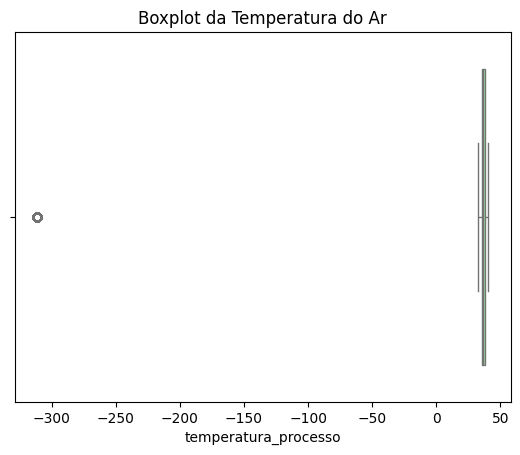

In [163]:
sns.boxplot(x=cel, color='lightgreen')
plt.title("Boxplot da Temperatura do Ar")
plt.show()

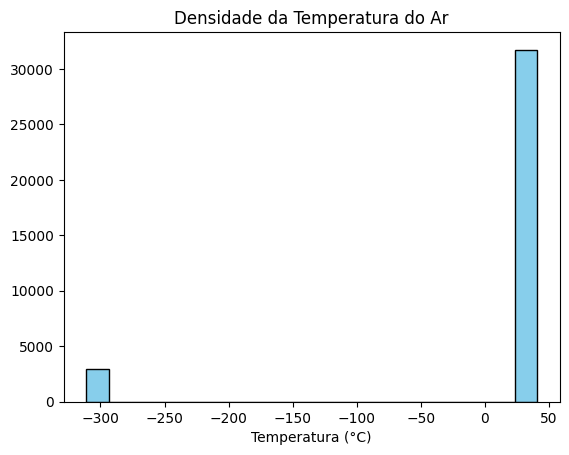

In [164]:
plt.hist(cel, bins=20, edgecolor='black', color='skyblue')
plt.title("Densidade da Temperatura do Ar")
plt.xlabel("Temperatura (°C)")
plt.show()

In [165]:
quantidade = (cel < -300).sum()
print(quantidade)

quantidade = (cel < 0).sum()
print(quantidade)

2939
2939


In [166]:
# Substituir por mediana
mediana = df['temperatura_processo'].median()
df.loc[(df['temperatura_processo'] < 273), 'temperatura_processo'] = mediana
cel = df["temperatura_processo"] - 273.15
cel.describe()

count    34661.000000
mean        36.798579
std          1.345361
min         32.550000
25%         35.750000
50%         36.650000
75%         37.750000
max         40.650000
Name: temperatura_processo, dtype: float64

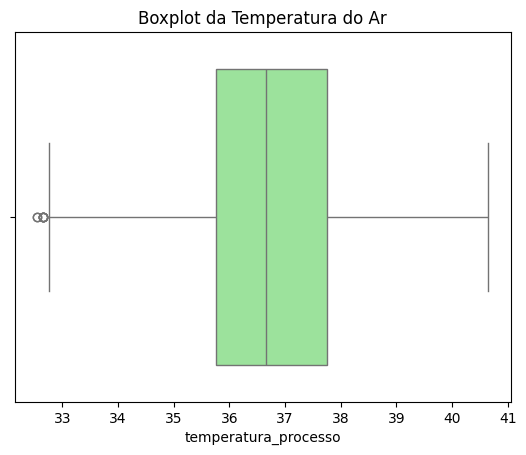

In [167]:
sns.boxplot(x=cel, color='lightgreen')
plt.title("Boxplot da Temperatura do Processo")
plt.show()

De pricipio vamos manter outliers pois ela pode ser um sinal quando ocorre as falhas 

In [172]:
# Iremos adicionar o valor da média para os valores faltantes 
df.fillna({'temperatura_processo': df['temperatura_processo'].mean()}, inplace=True)

### Umidade Relativa

Esta de acordo com esperado que seria os valores entre 0 a 100.

In [25]:
df['umidade_relativa'].describe()

count    35260.000000
mean        89.997672
std          0.142191
min         80.590429
25%         90.000000
50%         90.000000
75%         90.000000
max         94.575256
Name: umidade_relativa, dtype: float64

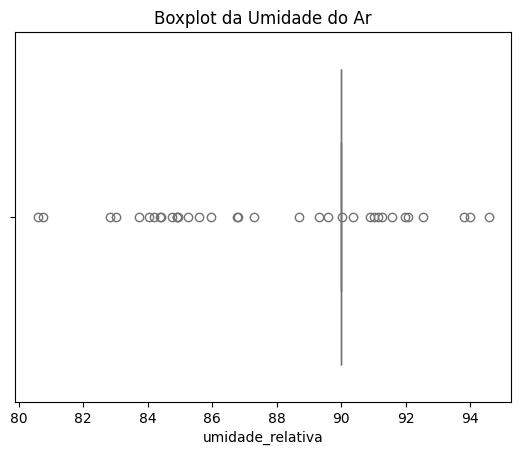

In [173]:
sns.boxplot(x=df['umidade_relativa'], color='lightgreen')
plt.title("Boxplot da Umidade do Ar")
plt.show()

### Velocidade Rotacional

In [175]:
df['velocidade_rotacional'].describe()

count    34509.000000
mean      1380.194181
std        494.098759
min       -161.000000
25%       1408.000000
50%       1483.000000
75%       1574.000000
max       2886.000000
Name: velocidade_rotacional, dtype: float64

In [176]:
quantidade = (df['velocidade_rotacional'] < -100).sum()
print(quantidade)

quantidade = (df['velocidade_rotacional'] < 0).sum()
print(quantidade)

quantidade = (df['velocidade_rotacional'] < -160 ).sum()
print(quantidade)

2968
2968
2968


O valor -161 está parecendo com valor default, será substituido pela mediana. E o valor faltante será substituido pela média 

In [178]:
# Substituir por mediana
mediana = df['velocidade_rotacional'].median()
df.loc[(df['velocidade_rotacional'] < 0), 'velocidade_rotacional'] = mediana
# substituir por media 
df.fillna({'velocidade_rotacional': df['velocidade_rotacional'].mean()}, inplace=True)
df['velocidade_rotacional'].describe()

count    35260.000000
mean      1521.588948
std        142.520146
min       1183.000000
25%       1437.000000
50%       1486.000000
75%       1571.000000
max       2886.000000
Name: velocidade_rotacional, dtype: float64

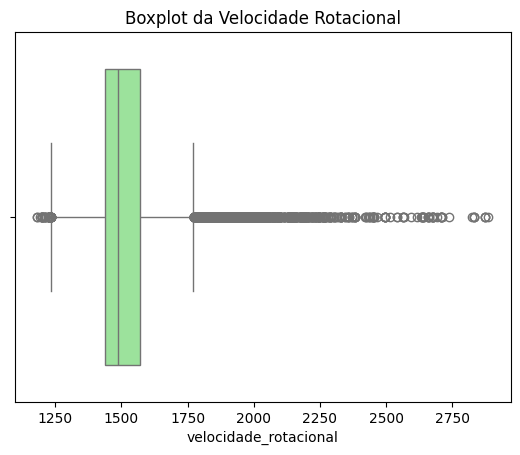

In [179]:
sns.boxplot(x=df['velocidade_rotacional'], color='lightgreen')
plt.title("Boxplot da Velocidade Rotacional")
plt.show()

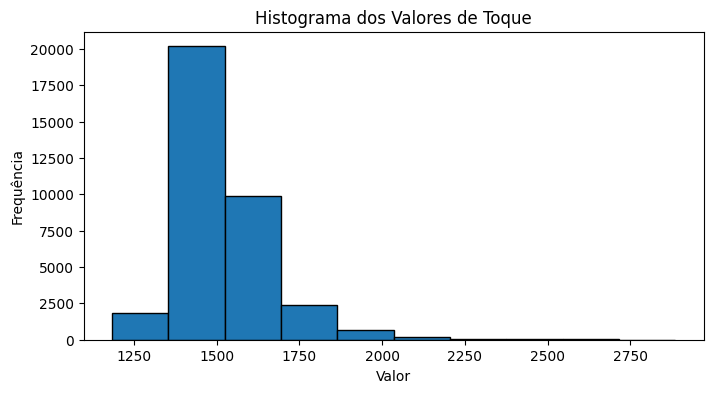

In [180]:
# Histograma
plt.figure(figsize=(8,4))
plt.hist( df['velocidade_rotacional'], bins=10, edgecolor='black')
plt.title("Histograma ")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

### Toque 

In [181]:
 df['torque'].describe()

count    34637.000000
mean        40.210357
std          8.831626
min          3.800000
25%         34.300000
50%         40.300000
75%         46.200000
max         76.600000
Name: torque, dtype: float64

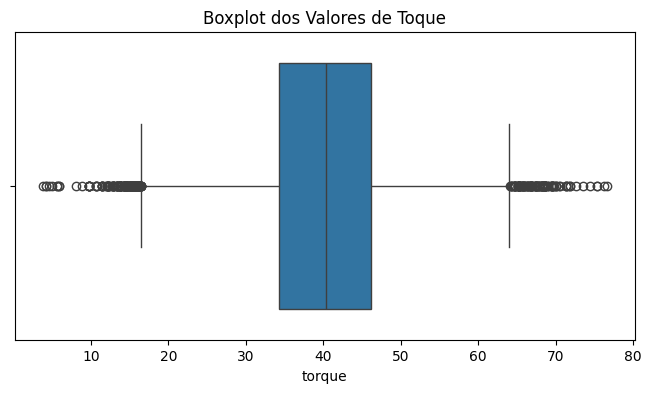

In [182]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df['torque'])
plt.title("Boxplot dos Valores de Toque")
plt.show()



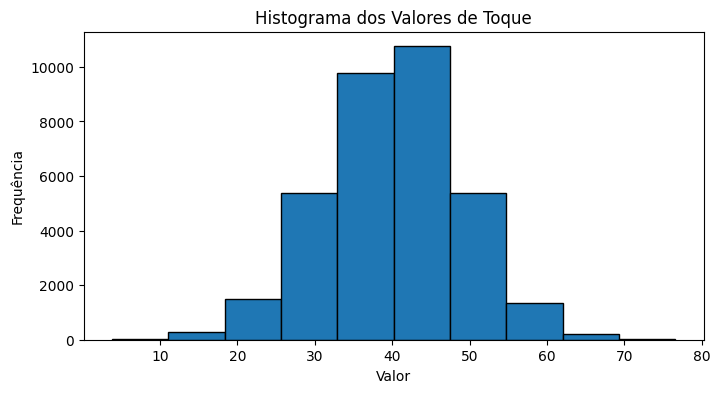

In [71]:
# Histograma
plt.figure(figsize=(8,4))
plt.hist( df['torque'], bins=10, edgecolor='black')
plt.title("Histograma dos Valores de Toque")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

### Desgaste da ferramenta

In [183]:
df['desgaste_da_ferramenta'].describe()

count    34308.000000
mean        74.373266
std        110.411937
min       -202.000000
25%         28.000000
50%         94.000000
75%        155.000000
max        253.000000
Name: desgaste_da_ferramenta, dtype: float64

Não faz sentido tempo negativo. Obtamos por substiuir por mediana e valor ausente pela média

In [185]:
mediana = df['desgaste_da_ferramenta'].median()
df.loc[(df['desgaste_da_ferramenta'] < 0), 'desgaste_da_ferramenta'] = mediana
# substituir por media 
df.fillna({'desgaste_da_ferramenta': df['desgaste_da_ferramenta'].mean()}, inplace=True)
df['desgaste_da_ferramenta'].describe()

count    35260.000000
mean       104.044013
std         59.938632
min          0.000000
25%         58.000000
50%         98.000000
75%        154.000000
max        253.000000
Name: desgaste_da_ferramenta, dtype: float64

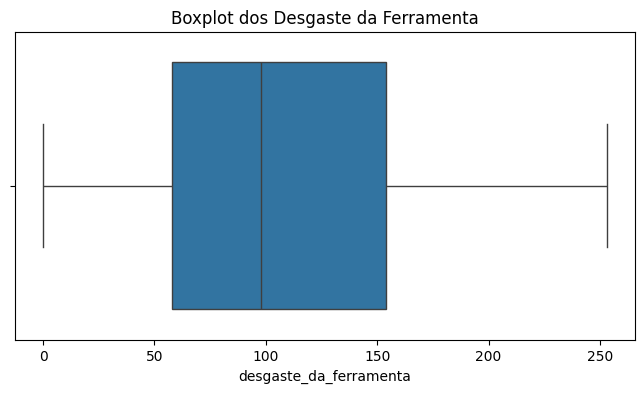

In [187]:
plt.figure(figsize=(8,4))
sns.boxplot(x= df['desgaste_da_ferramenta'])
plt.title("Boxplot dos Desgaste da Ferramenta")
plt.show()

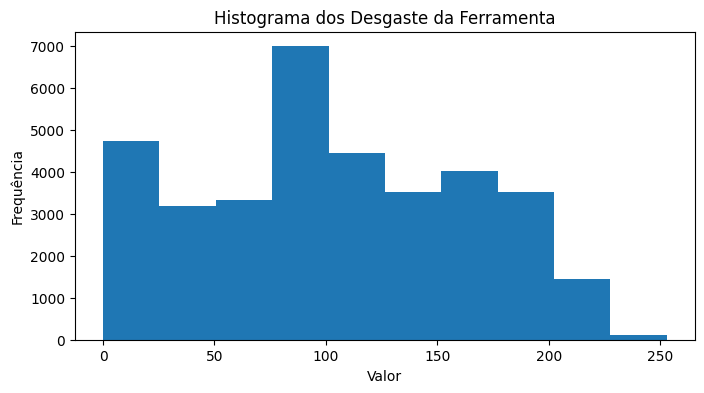

In [188]:
# Histograma
plt.figure(figsize=(8,4))
plt.hist( df['desgaste_da_ferramenta'], bins=10)
plt.title("Histograma dos Desgaste da Ferramenta")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()